# Discussion 3: The Most Ambitious Crossover Event Yet
#### Matplotlib meets Pandas meets Regular Expressions to do some basic exploratory data analysis.

This notebook will simulate the EDA process with a dataset you've seen a million times (`babynames`), giving you an opportunity to practice scouring data for interesting patterns using techniques you're already familiar with (Pandas, regular expressions, Matplotlib).

Given the `babynames` dataset, you will be first be asked to consider and discuss a variety of factors to obtain some baseline understanding of the dataset (types of column variables, how many observations, granularity or level of each observation, etc.)

Once you've obtained a baseline understanding, try to find some interesting trend/pattern/finding in the dataset, and then produce some graphical display of your finding! We have a list of potentially interesting trends to look for in case you get stuck, but if you or your group members think of something else, pursue it! If you want to go all-out with visualization, feel free to do so, but note visualization techniques will be emphasized more next week.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# loading up the California baby names data

import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

## Understanding and Critiquing the Data

The following questions are somewhat open-ended and intended to be discussed as a group. Feel free to add cells to type in answers/take notes or write some code to help you think/answer the questions.

### Structure

1. What format is the data in? Is it in rectangular form? Or some other format?

*The data appears to be in rectangular form (each record corresponds to a name at a point in time and the columns correspond to attributes about that record). The data table is also already arranged in the format of a rectangle.*

In [3]:
babynames

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134
...,...,...,...,...,...
400757,CA,M,2021,Zyan,5
400758,CA,M,2021,Zyion,5
400759,CA,M,2021,Zyire,5
400760,CA,M,2021,Zylo,5


2. What variables are included in the dataset? What are their types?

*Variables are State, Sex, Year, Name, and Count. Upon calling `babynames.dtypes`, we see that Year and Count are ints, as we would expect. You may be surprised that string columns are actually labelled as objects (State, Sex, Name). It turns out that Pandas stores strings into Numpy arrays of type object, by default, so this is not entirely unexpected. If we extract individual elements of each column and check their type using `type()`, we get that these columns are strings, which is what we would expect.*

In [4]:
babynames.columns

Index(['State', 'Sex', 'Year', 'Name', 'Count'], dtype='object')

In [6]:
babynames.dtypes

State    object
Sex      object
Year      int64
Name     object
Count     int64
dtype: object

In [10]:
type(babynames.loc[1, 'State'])

str

In [11]:
type(babynames.loc[1, 'Sex'])

str

In [12]:
type(babynames.loc[1, 'Name'])

str

3. Of these variables, which are categorical and which are quantitative? Of the quantitative variables, which are continuous and which are discrete? Of the categorical variables, which are nominal vs. ordinal?

*State, Sex, and Name are categorical variables. Count and year are quantitative. Count and year are also both discrete, and State, Sex, and Name are all nominal variables (there is no natural ordering among the categories for each variable).*

### Granularity, Scope, and Temporality

To assess such qualities of a dataset, we might require a little background info on the data source. Feel free to reference the following link when answering the questions, and be sure to think critically!
https://www.ssa.gov/oact/babynames/background.html

1. How would you assess the *granularity* of the data? What does each observation represent? Are the granular levels of each observation consistent, or is there a mismatch?

*Each observation represents the groups of individuals that were given particular names among those who applied for social security cards in the state of California, for each year from 1910 to 2021. The granular levels of each observation seem to be consistent, as each row of the dataset represents groups of individuals with the same name. We would have an issue with inconsistent granularity if, for example, we had several rows of individuals with the same name in the same year, as opposed to the other rows which are groups of individuals with the same name for each year. The data is thus a bit coarse, and it was likely aggregated by name from a larger dataset of individuals who applied for social security cards throuhgout the years.*

2. We're always concerned with our data being properly scoped so as to answer questions about some population(s) of interest. Let's suppose we wish to compare the popularity of babynames given in California in the year 1920. What are the population(s) of interest, and is the data properly scoped to accurately reflect these populations? We will come back to this point when you formulate/choose a question of interest.

*If we were to compare the popularity of babynames given in California in 1920, our population of interest would be all babies that were born and given names in the state of California for that year. The scope of the data to answer this is questionable, since according to the background information link provided above, "many people born before 1937 never applied for a Social Security card." So, our sample from this dataset would have dubious generalizability to the population of interest, and would be especially concerning if applying for social security cards at this time was also correlated to any other factors, like race, ethnicity, occupation, income level, etc. If any of these were true, our sample might be in danger of being heavily biased against the general population we wish to learn about.*

3. Describe the temporality of the dataset. How often/when is the data updated? Do the data exist outside the confines of time, or is there a time-dependence of observations? If there is a time-dependence, what time scale are we dealing with?

*It seems the data is updated every year (2021 was the last year included in the dats), although the website says the data also includes information up to March 2022. There is also a time-dependence of observations, and the scale of such a dependence is by year, since each observation represents a name in a particular year.*

### Faithfulness (and Missing Values)

1. Are there any missing values in the dataset?

In [ ]:
babynames.isnull().any().any()

*This dataset was likely already very clean, so we shouldn't expect any null values. However, as you've probably seen right now from homeworks and labs, do not assume this! Data can be very messy. In fact, many data scientists maintain that 80% of your time on a data science project should be spent solely on understanding and cleaning the data, so it's normally a big task!*

2. Are there any huge outliers in any quantitative variable? Try writing a some code with output to verify if there are any strong outliers in such variables. (Hint: the only real outliers you could get are in the count column, see if there are any out-of-the-ordinary count values. Options are to use the `describe()` method, or make a simple plot)

In [20]:
babynames.Count.describe()

count    400762.000000
mean         79.953781
std         295.414618
min           5.000000
25%           7.000000
50%          13.000000
75%          38.000000
max        8262.000000
Name: Count, dtype: float64

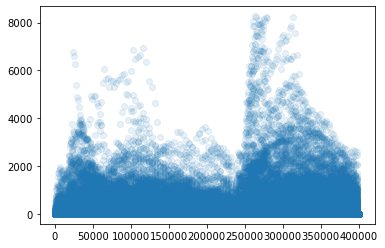

In [27]:
plt.scatter(x = babynames.index, y = babynames.Count, alpha = 0.1)

*It does not seem like there are any single huge outliers in counts. There may be a few names in a few years that are particularly high, but this makes sense in context since some names are quite commonly given. It also pays to think about how we could have outliers here: this data was probably taken from a larger dataset of SSA aplications across different years, and then aggregated by name. An outlier in the count variable could thus indicate that maybe a single name was accidentally included (via a bug, etc.) thousands and thousands of times, more so than other names. However, outlier checking typically is much more comprehensive than what can be gleaned from this single plot.*

3. If there are no missing values in the dataset, are we free from the perils of missing data? (hint: given the background link above, is this data completely raw? if not, how could missingness still affect us?)

*There are no missing values in this dataset per se, but relative to our population of interest (all babies named in the state of California from 1910 to 2021), we probably are missing many data points. See the discussion for 2 in **Granularity, Scope, and Temporality** for a sense of how perilous this might be.*

## Exploring the Data for Patterns

Having seen this dataset over and over again, and having to answer such a comprehensive set of questions about the data, you all probably have a solid intuition about the dataset and probably have some ideas of trends/patterns you may want to uncover. Discuss amongst yourselves what's something interesting to look for, and pursue it (try to formulate a question where you would have to use regular expressions; questions about certain letter patterns/pairings are good places to start)! Challenge yourselves to produce a plot at the end showing the result of your exploration.

If you don't have any ideas, feel free to start here:

+ As a proportion of individuals named in each year, how many babies have a double-vowel pattern appear at the end or start of their name, compared to somewhere in the middle (think: Aaron and Stephanie vs. Leah). For each year, you should have two proportions, one for the proportion of names with the pattern at either end and one for the proportion with the pattern in the middle.


+ For each year, how many male and female names have a triple vowel pattern somewhere in their name (L**eia**; ignore the first letter for simplicity)? Express each quantity as a proportion of total male or female names for each year, so that you have two proportions for each year. Plot each proportion with the x-axis as the year, and see if such name patterns are becoming more or less common when split by sex.


+ For each year, how many babies in CA had a name with a triple-consonant pattern somewhere in the middle of their name (e.g. Matthew, pattern does not include first and last letters)? Be sure to account for the frequency of the particular names for each year.


+ Consonant-Vowel or Vowel-Consonant? For each year, find the proportion of babies that had a name ending with a vowel followed by a consonant (Esth**er**) and the proportion of babies that had a name ending with a consonant followed by a vowel (Veroni**ca**). Plot the two proportions by year and compare differences and trends.

*Feel free to make as many new cells as you want; it's your EDA!*

*Also, feel free to Google for any coding tips. This link should give you an idea of how regular expressions can be used in Pandas to query data by string patterns (https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/)*. The `str.contains()` method may also be useful.

*Also, you can assume certain niceties about the Name column, like that all names begin with a capital letter and the remaining letter are lowercase, and there are no non-alphabetical characters in the names (note that, according to the background information link, names with hyphens are collapsed into single words)*

In [56]:
# possible solution for point 1

def get_dblvowel_ends(subdf):
    prop = subdf[subdf['Name'].str.contains('([aeiou][aeiou])$|^([AEIOU][aeiou])', \
                                            regex = True)]['Count'].sum()/subdf['Count'].sum()
    return(prop)

def get_dblvowel_mids(subdf):
    prop = subdf[subdf['Name'].str.contains('.[aeiou][aeiou].', \
                                            regex = True)]['Count'].sum()/subdf['Count'].sum()
    return(prop)

ends = babynames.groupby('Year').apply(get_dblvowel_ends)
mids = babynames.groupby('Year').apply(get_dblvowel_mids)

<function matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, *, y=None, **kwargs)>

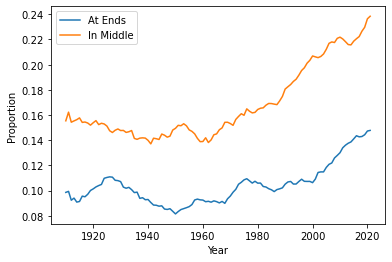

In [57]:
plt.plot(ends, label = 'At Ends')
plt.plot(mids, label = 'In Middle')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title

In [48]:
# possible solution for point 2

def get_trplvowel_props(subdf, sex):
    subdf = subdf[subdf['Sex'] == sex]
    prop = subdf[subdf['Name'].str.contains('[AEIOUaeiou]{3}', \
                                            regex = True)]['Count'].sum()/subdf['Count'].sum()
    return(prop)

m_props = babynames.groupby('Year').apply(get_trplvowel_props, sex = 'M')
f_props = babynames.groupby('Year').apply(get_trplvowel_props, sex = 'F')

Text(0, 0.5, 'Proportion')

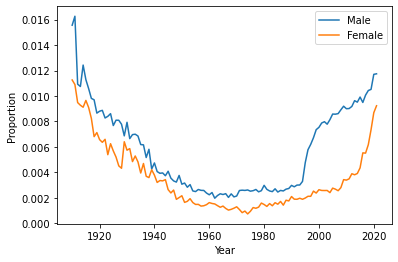

In [49]:
plt.plot(m_props, label = 'Male')
plt.plot(f_props, label = 'Female')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportion')

In [50]:
# possible solution for point 3

def get_trplcons_mids(subdf):
    num = subdf[subdf['Name'].str.contains('.[^aeiou]{3}.', \
                                            regex = True)]['Count'].sum()
    return(num)

mids = babynames.groupby('Year').apply(get_trplcons_mids)

Text(0, 0.5, 'Count')

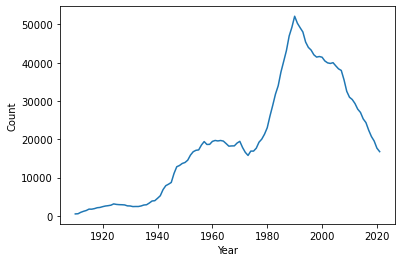

In [51]:
plt.plot(mids)
plt.xlabel('Year')
plt.ylabel('Count')

In [62]:
# possible solution for point 4

def get_consvowel_prop(subdf):
    prop = subdf[subdf['Name'].str.contains('([^aeiou][aeiou])$', \
                                            regex = True)]['Count'].sum()/subdf['Count'].sum()
    return(prop)

def get_vowelcons_prop(subdf):
    prop = subdf[subdf['Name'].str.contains('([aeiou][^aeiou])$', \
                                            regex = True)]['Count'].sum()/subdf['Count'].sum()
    return(prop)

consvowel = babynames.groupby('Year').apply(get_consvowel_prop)
vowelcons = babynames.groupby('Year').apply(get_vowelcons_prop)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/strings/accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


Text(0, 0.5, 'Proportion')

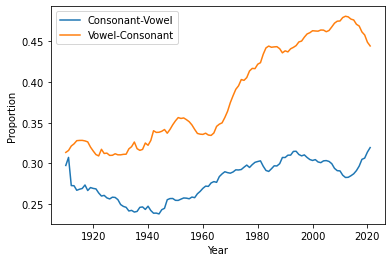

In [63]:
plt.plot(consvowel, label = 'Consonant-Vowel')
plt.plot(vowelcons, label = 'Vowel-Consonant')
plt.legend()
plt.xlabel('Year')
plt.ylabel('Proportion')

## Post-EDA Critique

1. What did you find in your analysis?


2. Datasets are always representations of some population of interest. Let's suppose our population of interest is all individuals living in the state of California from 1910 to 2021. Would you be comfortable extending your findings to this population? Why or why not? (hint: consider our previous discussion about *scope*)

*The answers to these are largely qualitative and involve some thinking about the population of interest and what exact pattern you tried to isolate. Regardless of what pattern you noticed, it may be difficult extending this to our population of interest given the above discussion about scope.*